In [ ]:
!git clone https://github.com divyarubha

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900

In [8]:
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [18]:
df_encoded = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
X = df_encoded.drop('area', axis=1)
y = df_encoded['area']
print(y)


0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64


In [22]:
y_pred = model.predict(X_test)
print(y_pred)


[ 19.929        5.2983      20.4621      10.7202      12.9201
   1.1926       8.364       12.4545       5.9332       7.6136
   8.577        8.94616667   4.9409       2.5046       6.42
   7.8909       7.8095       5.9025      13.1415       4.3137
   7.4275      13.4187      11.03369333   3.54438667  10.25985
  19.0641      14.8319     170.4293      14.6309       8.568025
   4.0053      11.4365       7.2804       4.2034       6.4501
  22.6527      13.7441       3.67866667  11.6989       0.8813
  27.5613       3.07618167  10.07925     11.6413      68.2141
  35.78134      8.64270476   5.9933       5.1177      20.1512
   8.3128      24.73647333  13.5272       0.4282      12.2133
   2.8892       5.9849       7.5738       9.5996      10.41793333
   4.4322       6.7784      21.30145     14.0156       3.7245
   7.3211       3.8391      13.6084      23.32174333   7.4931
  14.44413333  21.6416       8.8759       5.9391       3.0984
   6.6946      32.8969       4.5892      12.7652       3.2026
   

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"\nMean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 11955.85690856404
R2 Score: -0.014260110284941785


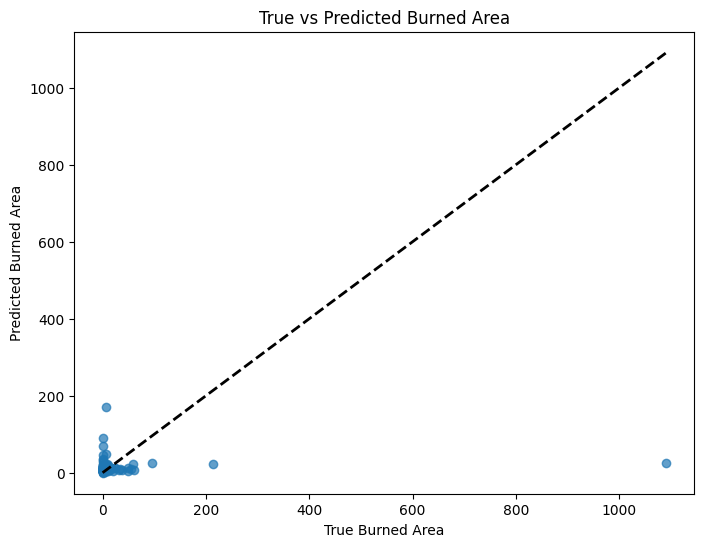

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Burned Area")
plt.ylabel("Predicted Burned Area")
plt.title("True vs Predicted Burned Area")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()